<a href="https://colab.research.google.com/github/SimenKlemp/Tensorflow/blob/main/hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem 1**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def dz_dx(x, y): 
  return ((x-2)/(np.sqrt(25 - (x-2)**2 - (y-3)**2)))


def dz_dy(x, y): 
  return ((y-3)/(np.sqrt(25 - (x-2)**2 - (y-3)**2)))


**Using GD**

x =  1.9997506036725685
y =  2.9996252788849134
ephochs needed to converge: 4419


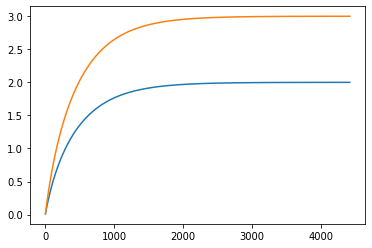

In [16]:
x_start_gd = 0.01
y_start_gd = 0.01

learning_rate = 0.01

max_limit_gd = 4419

x_start_history_gd = np.zeros(max_limit_gd) 
y_start_history_gd = np.zeros(max_limit_gd)

x_incremental_gd = x_start_gd
y_incremental_gd = y_start_gd

i_gd = 0

while(x_incremental_gd > 0.000001 and y_incremental_gd > 0.000001):

  x_start_history_gd[i_gd] = x_start_gd
  y_start_history_gd[i_gd] = y_start_gd

  dx = dz_dx(x_start_gd, y_start_gd)
  dy = dz_dy(x_start_gd, y_start_gd)

  x_start_gd = x_start_gd - learning_rate * dx
  y_start_gd = y_start_gd - learning_rate * dy

  x_incremental_gd = x_start_gd - x_start_history_gd[i_gd-1]
  y_incremental_gd = y_start_gd - y_start_history_gd[i_gd-1]

  i_gd += 1


print("x = ", x_start_history_gd[max_limit_gd - 1])
print("y = ", y_start_history_gd[max_limit_gd - 1])

plt.plot(x_start_history_gd)
plt.plot(y_start_history_gd)
print("ephochs needed to converge:", i_gd)

**Using Momentum**

x =  1.9999815097369364
y =  2.999972218147459
ephochs needed to converge: 436


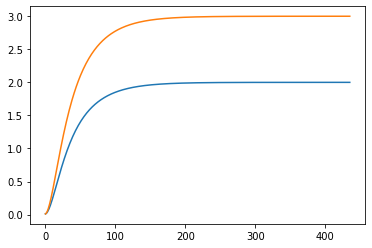

In [15]:
x_start_momentum = 0.01
y_start_momentum = 0.01

max_limit_momentum = 436

x_start_history_momentum = np.zeros(max_limit_momentum) 
y_start_history_momentum = np.zeros(max_limit_momentum)

x_incremental_momentum = x_start_momentum
y_incremental_momentum = y_start_momentum

gamma = 0.9
update_x = 0
update_y = 0

i_momentum = 0

while(x_incremental_momentum > 0.000001 and y_incremental_momentum > 0.000001):

  x_start_history_momentum[i_momentum] = x_start_momentum
  y_start_history_momentum[i_momentum] = y_start_momentum

  dx = dz_dx(x_start_momentum, y_start_momentum)
  dy = dz_dy(x_start_momentum, y_start_momentum)

  update_x = (gamma * update_x) + learning_rate * dx
  update_y = (gamma * update_y) + learning_rate * dy

  x_start_momentum = x_start_momentum - update_x
  y_start_momentum = y_start_momentum - update_y

  x_incremental_momentum = x_start_momentum - x_start_history_momentum[i_momentum-1]
  y_incremental_momentum = y_start_momentum - y_start_history_momentum[i_momentum-1]

  i_momentum += 1


print("x = ", x_start_history_momentum[max_limit_momentum - 1])
print("y = ", y_start_history_momentum[max_limit_momentum - 1])

plt.plot(x_start_history_momentum)
plt.plot(y_start_history_momentum)
print("ephochs needed to converge:", i_momentum)

# **Problem 2**

In [18]:
##Printing ephocs for gd and momentum
print("Ephocs needed with momentum:", i_momentum)
print("Ephochs needed with gd:", i_gd)

##Computing the convergence difference 
convergence_difference = i_momentum/i_gd

print("Momentum will converge with", convergence_difference * 100,
"% less ephocs than gd")

Ephocs needed with momentum: 436
Ephochs needed with gd: 4419
Momentum will converge with 9.866485630233084 % less ephocs than gd


The result shows us that Momentum as optimizer will cause a convergence with approximetly 10% less ephochs!